In [1]:
from dash import Dash, dcc, html
from dash import Input, Output, callback
import pandas as pd

import sys
sys.path.append('../lib/')
from financelib import PF_Load
from financelib import PF_Basic
from financelib import PF_Plot

In [2]:
import plotly.express as px
from plotly import graph_objects as go

In [3]:
import datetime as dt
import dateutil.parser as dp
idx2month = dict({0:'January', 1:'February',2: 'March', 3:'April', 4:'May', 5:'June', 6:'July', 7:'August', 8:'September', 9:'October', 10:'November', 11:'December'})

In [4]:
df2023_months = PF_Load.get_df_year(2023,12)
df2023_year = pd.concat(df2023_months) 

Month 1 missing
Month 2 missing
Month 3 missing
Month 4 missing
Month 5 missing
Month 6 missing
Month 7 missing
Month 8 missing
Month 9 missing
Month 10 missing
Month 11 missing


In [5]:
current_month = 12
df_months = PF_Load.get_df_year(2024,current_month)
df_year = pd.concat(df_months) 

balance_hype, balance_revolut, incomes_year, expenses_year, balance_cash = PF_Basic.get_generals(df_year)
print("GENERAL STATS")
print(f"Hype Balance: €{round(balance_hype,2)}")
print(f"Revolut Balance: €{round(balance_revolut,2)}")
print(f"Cash Balance: €{round(balance_cash,2)}")
print(f"Year Incomes: {incomes_year}")
print(f"Year Expenses: {expenses_year}")

GENERAL STATS
Hype Balance: €14382.58
Revolut Balance: €28.61
Cash Balance: €300.0
Year Incomes: 22451.0
Year Expenses: -7791.02


In [6]:
def extract_hist_incomes(df):
    df_incomes = df.loc[ ((df["Coin"] == "EUR") & (df["Category"] != "Transfer") & (df["Qty"] > 0)) ]
    incomes = df_incomes['Qty'].abs().values
    df_incomes = df_incomes.assign(Incomes = incomes) # Creates new columns "Expenses"
    
    return df_incomes
df_year_eur_incomes = extract_hist_incomes(df_year)

### Cashflow
Income:
* Employment
* Financial (dividends)
* Taxes (expected, applied on incomes as negative values)
* Pensions

Expenses:
* All the weird categories

Then calculate saving rate

In [7]:
# Get Incomes and Expenses from Salary
months = list()
incomes_months = list()
expenses_months = list()
saving_rate_months = list()
net_months = list()
cat_expenses_months = list() # list of df_month
for n, df_month in enumerate(df_months):
    months.append(idx2month[n])
    _,_, incomes, expenses, _ = PF_Basic.get_generals(df_month)
    incomes_months.append(incomes)
    expenses_months.append(expenses)
    net_months.append(round(incomes-abs(expenses),2))
    saving_rate_months.append(round((incomes-abs(expenses))/incomes,2))
    cat_expenses_months.append(PF_Basic.get_category_expenses(df_month))

# GENERAL VIEW PLOT
zipped = zip(months, incomes_months, expenses_months, saving_rate_months, net_months)
columns = ["Month","Incomes","Expenses","Saving Rate", "Net"]
df_cashflow = pd.DataFrame(data=zipped,columns=columns)

In [28]:
df_cashflow.T

0         1        2       3        4       5        6   \
Month        January  February    March   April      May    June     July   
Incomes       2037.0    1642.0   1630.0  1642.0   1682.0  1688.0   2514.0   
Expenses    -1069.21   -878.36  -359.75 -936.96  -614.41 -842.75  -386.74   
Saving Rate     0.48      0.47     0.78    0.43     0.63     0.5     0.85   
Net           967.79    763.64  1270.25  705.04  1067.59  845.25  2127.26   

                  7          8        9         10        11  
Month         August  September  October  November  December  
Incomes       1694.0     1694.0   1778.0    1693.0    2757.0  
Expenses     -489.54     -621.0  -569.47   -544.63    -478.2  
Saving Rate     0.71       0.63     0.68      0.68      0.83  
Net          1204.46     1073.0  1208.53   1148.37    2278.8

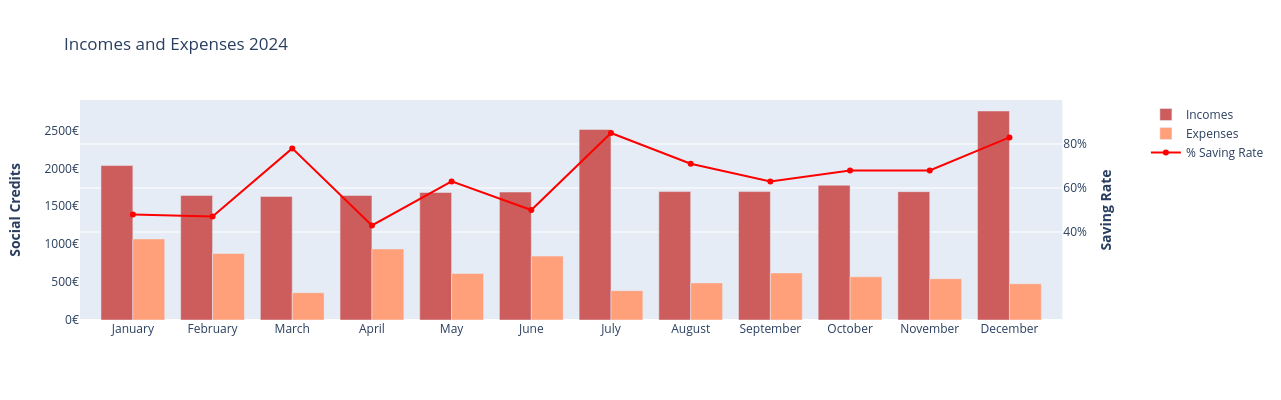

In [9]:
fig_general = PF_Plot.general_view(df_cashflow)
fig_general.show()

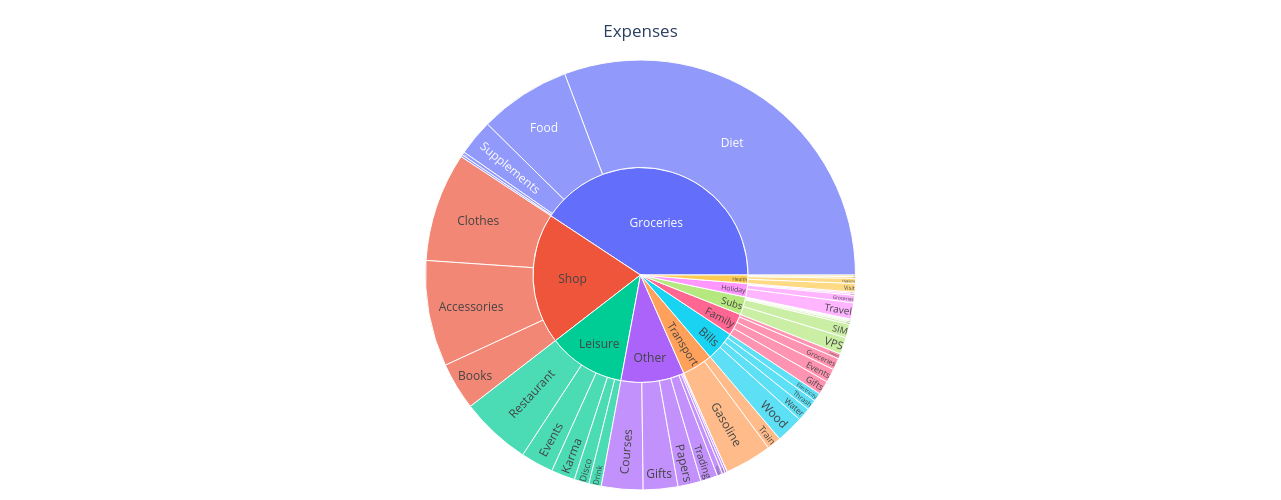

In [10]:
df_year_expenses = PF_Basic.extract_hist_expenses(df_year)
fig = PF_Plot.plot_hist_expenses(df_year_expenses)
#fig = PF_Plot.plot_hist_expenses(df_year_expenses, plot_categories = True)
fig.show()

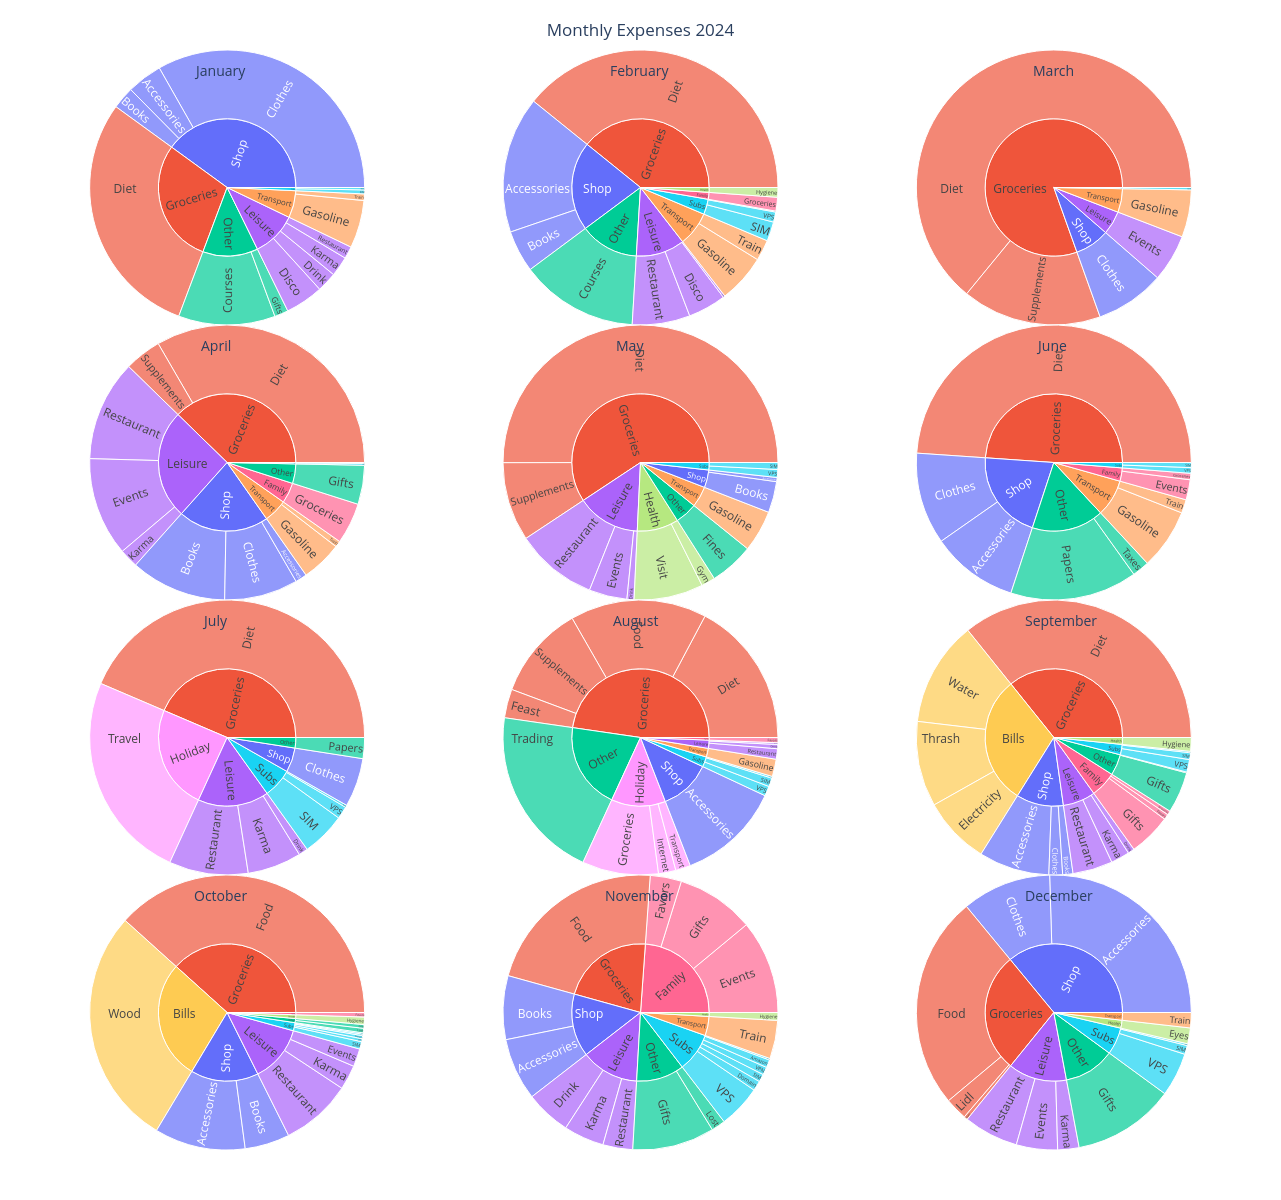

In [11]:
PF_Plot.plot_hist_expenses_month(df_months, months)

In [12]:
df_SOL_month = PF_Load.get_df_crypto(df_year, "SOL")
df_SOL_holdings = PF_Load.get_crypto_holdings(df_SOL_month, "SOL")

In [13]:
df_ETH_month = PF_Load.get_df_crypto(df_year, "ETH")
df_ETH_holdings = PF_Load.get_crypto_holdings(df_ETH_month, "ETH")

In [14]:
dates = df_SOL_holdings.Date.values
tot_crypto_holdings = df_SOL_holdings['Holdings €'].values + df_ETH_holdings['Holdings €'].values

In [15]:
df_crypto_holdings = pd.DataFrame(data=zip(dates, tot_crypto_holdings), columns=['Date','Holdings €'])
df_crypto_holdings["shift"] = df_crypto_holdings.shift(1)["Holdings €"]
df_crypto_holdings["Crypto Change %"] = (df_crypto_holdings["Holdings €"] - df_crypto_holdings["shift"] )/ df_crypto_holdings["Holdings €"]

In [16]:
df_crypto_holdings

Date  Holdings €   shift  Crypto Change %
0   2023-12      473.56     NaN              NaN
1   2024-01      462.45  473.56        -0.024024
2   2024-02      601.80  462.45         0.231555
3   2024-03      952.94  601.80         0.368481
4   2024-04      611.48  952.94        -0.558416
5   2024-05      783.76  611.48         0.219812
6   2024-06      702.00  783.76        -0.116467
7   2024-07      807.59  702.00         0.130747
8   2024-08      623.45  807.59        -0.295356
9   2024-09      694.37  623.45         0.102136
10  2024-10      780.74  694.37         0.110626
11  2024-11     1134.56  780.74         0.311857

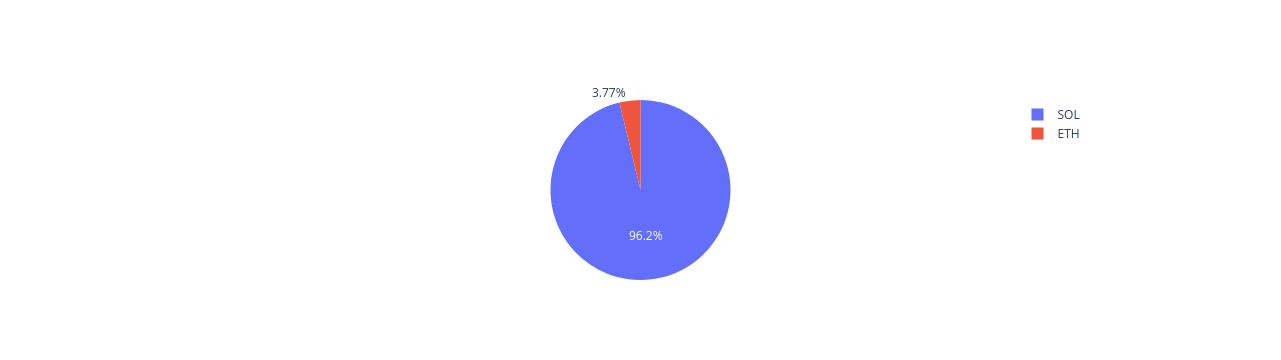

In [17]:
labels = ['SOL','ETH']
values = [df_SOL_holdings['Holdings €'].values[-1], df_ETH_holdings['Holdings €'].values[-1]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()

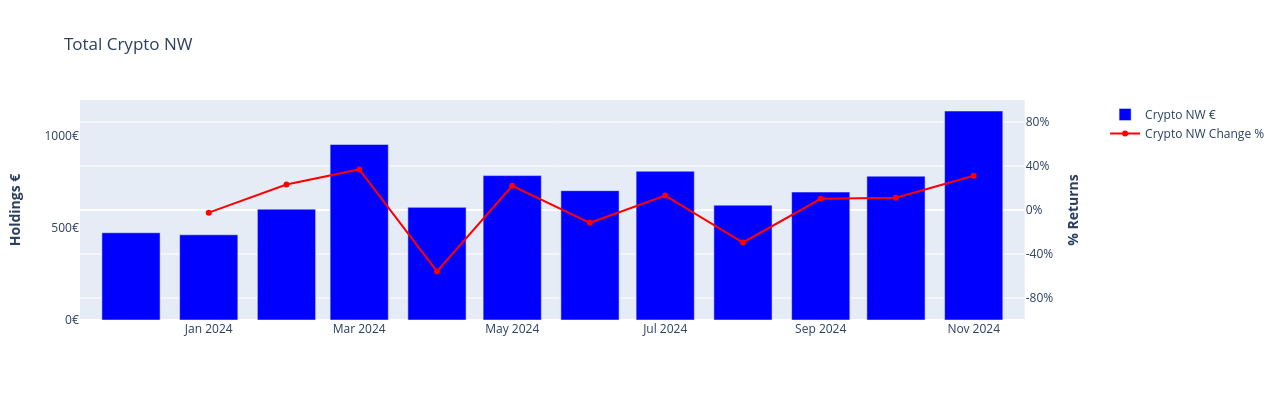

In [18]:
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(
    go.Bar(
        x=df_crypto_holdings["Date"],
        y=df_crypto_holdings["Holdings €"],
        name='Crypto NW €',
        marker_color='blue'
    ),
    secondary_y = False
)
fig.add_trace(
    go.Scatter(x=df_crypto_holdings["Date"],y=df_crypto_holdings["Crypto Change %"]*100, line=dict(color='red'), name='Crypto NW Change %'),
    secondary_y = True
)

fig.update_layout(
    title = "Total Crypto NW",
    barmode='group', xaxis_tickangle=0,
    width=1000, height=400,
    yaxis=dict(
        title=dict(text="<b>Holdings €</b>"),
        side="left",
        tickmode = 'array',
        tickvals = [0, 500, 1000, 1500, 2000, 2500],
        ticktext = ['0€', '500€', '1000€', '1500€', '2000€', '2500€'],
        showgrid = False
    ),
    yaxis2=dict(
        title=dict(text="<b>% Returns</b>"),
        side="right",
        range=[-100, 100],
        overlaying="y",
        tickmode = 'array',
        tickvals = [-80,-40, 0, 40, 80],
        ticktext = ['-80%', '-40%', '0%', '40%', '80%']
    ),
)

fig.show()

### FIRE Metrics

In [19]:
df2023_year_expenses = PF_Basic.extract_hist_expenses(df2023_year)
df_year_expenses = PF_Basic.extract_hist_expenses(df_year)

In [20]:
current_year_expenses = df_year_expenses['Qty'].sum()
current_year_saved = df_cashflow['Net'].sum()

In [21]:
# Last year expenses until current month
current_month = 12
sum_expenses = 0
sum_saved = 0
for i in range(current_month, 12):
    sum_expenses += PF_Basic.extract_hist_expenses(df2023_months[i])['Qty'].sum()
    sum_saved += 0

In [22]:
current_yearly_expediture = current_year_expenses + sum_expenses
current_yearly_saved = current_year_saved + sum_saved

In [33]:
desired_wd = 0.03
fu_number = abs(current_yearly_expediture) / desired_wd
print(fu_number)

259700.63333333336


In [34]:
nw = balance_hype + balance_revolut + balance_cash + df_crypto_holdings.iloc[current_month-1]['Holdings €']
progress_fi = nw / fu_number
print(progress_fi)

0.06101544611815219


In [35]:
current_yearly_monthly_savings = current_yearly_saved/12

In [36]:
months_left_to_fire = (fu_number - nw)/current_yearly_monthly_savings
print(f"Months left to FIRE: {int(months_left_to_fire)}")

Months left to FIRE: 199


### Calculating NW in RIP manner
Categories:
* Stocks / ETF
* Bonds
* Crypto
* Private Equity
* Business
* Cash / Liquidity (Bank, Revolut, Paypal)
* Taxes (Expected taxes on income, capital gain, already payed taxes)


In [ ]:
try: 
    pd.read_csv("path/to/stocks-etf")
    pd.read_csv("path/to/bonds")
    pd.read_csv("path/to/crypto")
    pd.read_csv("private-equity")
    pd.read_csv("business")
    pd.read_csv("cash-liquidity")
    pd.read_csv("taxes")
except: